# Notebook for all simulations

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from check_warmup import avg_warmup_count, plot_avg_warmup_count

from environment import GLMBandit

from glmbanditexp.algorithms.ecolog import EcoLog
from glmbanditexp.algorithms.gloc import Gloc
from glmbanditexp.algorithms.glm_ucb import GlmUCB
from glmbanditexp.algorithms.rs_glinucb import RS_GLinUCB

### Warm-up Count for Rarely-Switching GLBandit

In [2]:
num_trials = 5
d=5
K=10
T=200000
kappa=50.0
R=1.0
S=5.0
lmbda=20.0
seed=186329

Running trial 1


100%|██████████| 200000/200000 [00:16<00:00, 12083.71it/s]


Running trial 2


100%|██████████| 200000/200000 [00:17<00:00, 11113.84it/s]


Running trial 3


100%|██████████| 200000/200000 [00:17<00:00, 11432.73it/s]


Running trial 4


100%|██████████| 200000/200000 [00:17<00:00, 11370.72it/s]


Running trial 5


100%|██████████| 200000/200000 [00:17<00:00, 11228.32it/s]


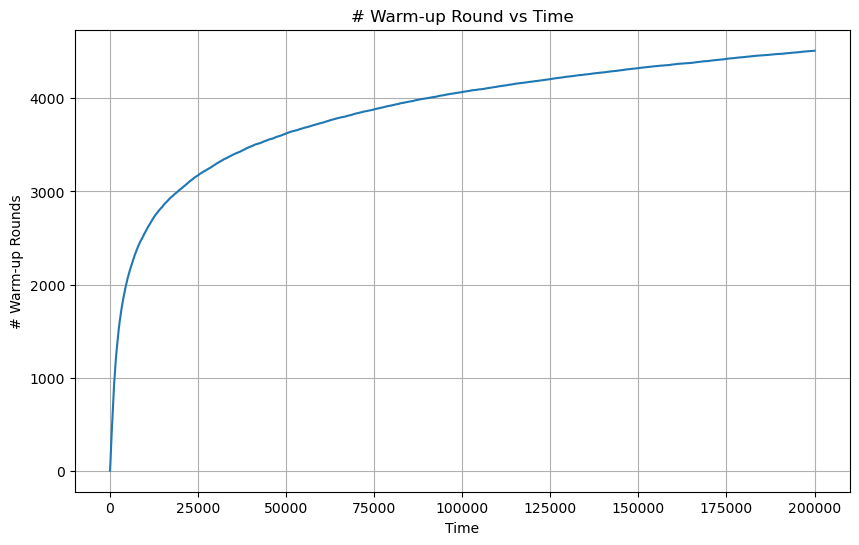

In [3]:
count = avg_warmup_count(num_trials, d, K, T, kappa, R, S, lmbda, seed)
plot_avg_warmup_count(count, show_flag=True)

## Regret Simulations

In [2]:
def simulate(num_trials, env, algo_names_list, delta):
    regret_dict = {k: np.zeros((env.T,)) for k in algo_names_list}
    for n in range(num_trials):
        algo_arr = []
        print('Simulating trial', n+1)
        for k in algo_names_list:
            if k == 'RS-GLinUCB':
                algo = RS_GLinUCB(env.get_first_action_set(), env.kappa, env.R, env.S, env.model, env.T, delta)
                # algo = RSGLBandit(env.get_first_action_set(), lmbda, C, wc, gm, env.kappa, env.R, env.S, env.model)
            elif k == 'GLOC':
                algo = Gloc(env.get_first_action_set(), env.kappa, env.R, env.S, env.model, delta)
            elif k == 'GLM-UCB':
                algo = GlmUCB(env.get_first_action_set(), env.kappa, env.R, env.S, env.model, env.T, delta)
            elif k == 'EcoLog':
                algo = EcoLog(env.get_first_action_set(), env.kappa, env.R, env.S, env.model, delta)
            algo_arr.append(algo)
    
        for t in tqdm(range(env.T)):
            act_arr = []
            for algo in algo_arr:
                act_arr.append(algo.play_arm())
            try:
                rewards, regrets, next_arm_set = env.step(act_arr)
            except:
                print(act_arr)


            for j, algo in enumerate(algo_arr):
                # if(algo.warmup_flag):
                #     print(f"Round {t} : Theta_w =",  algo.theta_hat_w)
                # elif(t%50 == 1):
                #     print(f"Round {t} : Theta_tau= ", algo.theta_hat_tau)                    
                algo.update(rewards[j], regrets[j], next_arm_set)
        
        for algo in algo_arr:
            regret_dict[algo.name] += np.array(algo.regret_arr)
        env.reset()
    
    for k in regret_dict.keys():
        regret_dict[k] /= num_trials
    
    return regret_dict,algo_arr


In [3]:
def plot_regret(rg_dict, T):
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    T_arr = np.arange(1, T+1)
    for k in rg_dict.keys():
        ax.plot(T_arr, np.cumsum(rg_dict[k]), label=k)
    ax.legend()
    ax.grid()
    ax.set_xlabel('Time')
    ax.set_ylabel('Regret')
    ax.set_title('Regret vs Time')
    plt.show()

### Logistic Model Simulation

In [4]:
config = {}
config['seed'] = 109832
config['model'] = 'Logistic'
config['theta_dim'] = 2
config['num_arms'] = 5
config['theta_norm'] = 5.0
config['horizon_length'] = 5000

env = GLMBandit(config=config)
print('Kappa =', env.kappa)

Calculating kappa...


100%|██████████| 5000/5000 [00:00<00:00, 29828.24it/s]


Kappa = 29.114899816551187


Simulating trial 1


100%|██████████| 5000/5000 [00:25<00:00, 196.77it/s]


Simulating trial 2


100%|██████████| 5000/5000 [00:24<00:00, 201.27it/s]


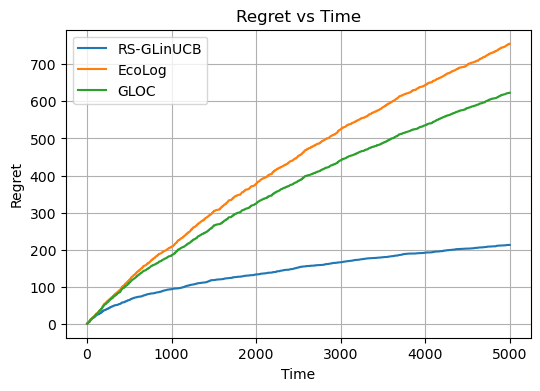

In [5]:
algo_names_list = ['RS-GLinUCB', 'EcoLog', 'GLOC']
num_trials = 2

regret_dict,algo_arr = simulate(num_trials, env, algo_names_list, 0.01)
plot_regret(regret_dict, env.T)

In [6]:
config = {}
config['seed'] = 109832
config['model'] = 'Logistic'
config['theta_dim'] = 3
config['num_arms'] = 20
config['theta_norm'] = 5.0
config['horizon_length'] = 2000

env = GLMBandit(config=config)
print('Kappa =', env.kappa)

Calculating kappa...


100%|██████████| 2000/2000 [00:00<00:00, 24070.47it/s]


Kappa = 17.83940123029755


Simulating trial 1


100%|██████████| 2000/2000 [00:12<00:00, 163.71it/s]


Simulating trial 2


100%|██████████| 2000/2000 [00:11<00:00, 167.73it/s]


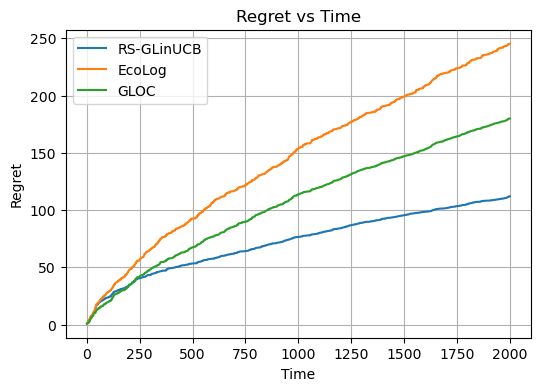

In [7]:
algo_names_list = ['RS-GLinUCB', 'EcoLog', 'GLOC']
num_trials = 2

regret_dict,algo_arr = simulate(num_trials, env, algo_names_list, 0.01)
plot_regret(regret_dict, env.T)

### Probit Model Simulation

In [8]:
config = {}
config['seed'] = 109832
config['model'] = 'Probit'
config['theta_dim'] = 3
config['num_arms'] = 5
config['theta_norm'] = 3.0
config['horizon_length'] = 2000

env = GLMBandit(config=config)
print('Kappa =', env.kappa)

Calculating kappa...


100%|██████████| 2000/2000 [00:00<00:00, 39720.48it/s]


Kappa = 9.86119422530359


Simulating trial 1


100%|██████████| 2000/2000 [00:42<00:00, 46.74it/s]


Simulating trial 2


100%|██████████| 2000/2000 [00:43<00:00, 46.24it/s]


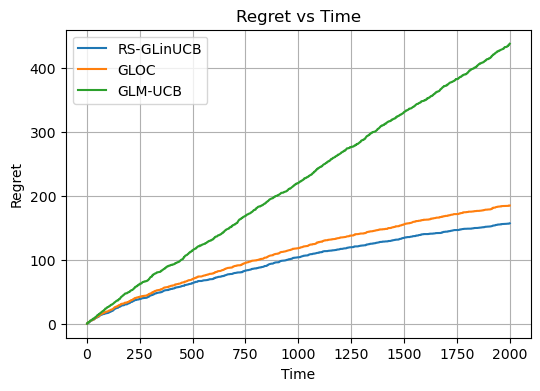

In [9]:
algo_names_list = ['RS-GLinUCB', 'GLOC', 'GLM-UCB']
num_trials = 2

regret_dict,algo_arr = simulate(num_trials, env, algo_names_list, 0.01)
plot_regret(regret_dict, env.T)